Before you turn this problem in, make sure everything runs as expected. First, **restart the kernel** (in the menubar, select Kernel$\rightarrow$Restart) and then **run all cells** (in the menubar, select Cell$\rightarrow$Run All).

Make sure you fill in any place that says `YOUR CODE HERE` or "YOUR ANSWER HERE", as well as your name and collaborators below:

In [1]:
NAME = "Федорова Арина"
COLLABORATORS = ""

---

# Интерполяция при помощи полиномов Лагранжа.

In [2]:
import numpy as np

class LagrangeInterpolator:
    """Lagrange interpolating polynomial.
    
    Given a set of pairs ``(x_k, y_k)``, construct 
    a Lagrange polynomial ``f(x)``, such that
    
    .. math::

        f(x_k) = y_k   for k =0, ..., n-1
    
    Parameters
    ----------
    xk : array_like, shape(n,)
        Abscissas
    yk : array_like, shape(n,)
        Ordinates
    
    Attributes
    ----------
    __call__
    
    """
    def __init__(self, xk, yk):
        self.xk = np.asarray(xk, dtype=float)
        self.yk = np.asarray(yk, dtype=float)
        
    def __call__(self, x):
        """Evaluate the interpolator at a given point.
        
        Parameters
        ----------
        x : float
        
        Returns
        -------
        the value of the interpolator at ``x``.
        """
        lagrange_polynom = 0
        for i in range(0, len(self.xk)):
          basis_polynom = 1
          for j in range(0, len(self.xk)):
            if j != i:
              basis_polynom *= (x-self.xk[j]) / (self.xk[i]-self.xk[j])
          lagrange_polynom += basis_polynom * self.yk[i]
        return lagrange_polynom

In [3]:
def runge_func(x, a=25):
    return 1.0 / (1.0 + a*x**2)

xx = np.linspace(-2, 2, 21)
yy = runge_func(xx)

lagr = LagrangeInterpolator(xx, yy)

from numpy.testing import assert_allclose

assert_allclose(yy,
                [lagr(xval) for xval in xx],
                atol=1e-14)

Рассмотрим функцию Рунге $1/(1 + 25x^2)$. Интерполируйте данную функцию на интервале $x\in [-2, 2]$, используя полиномы Лагранжа степени $m$, где $m=3, 5, 7, 11$. Используйте равномерную сетку. Постройте результат интерполяции вместе с $f(x)$.

Повторите предыдущее задание используя узлы Чебышева. Сравните качество интерполяции на равномерной сетке и на узлах Чебышева.


No handles with labels found to put in legend.


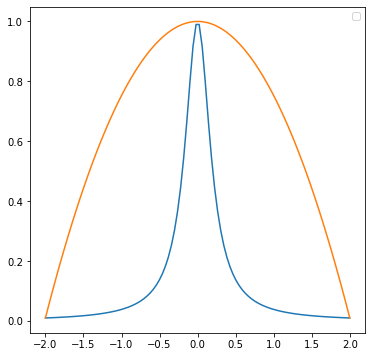

No handles with labels found to put in legend.


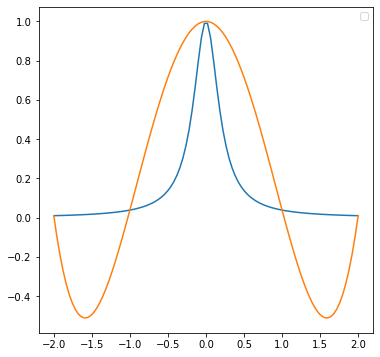

No handles with labels found to put in legend.


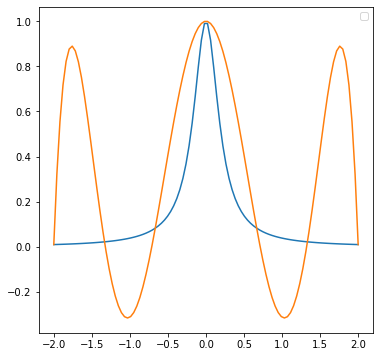

No handles with labels found to put in legend.


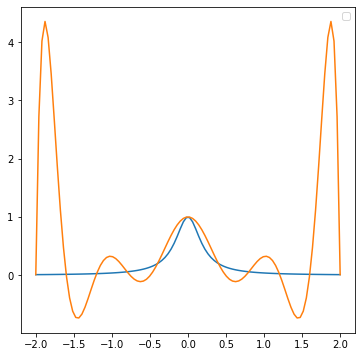

In [4]:
import matplotlib.pyplot as plt

x_range = np.linspace(-2, 2, 100)
y_range = runge_func(x_range)

m = [3, 5, 7, 11]
for i in m:
  plt.figure(figsize=(6, 6))
  plt.plot(x_range, y_range)
  xx = np.linspace(-2, 2, i)
  yy = runge_func(xx)

  lagranges = LagrangeInterpolator(xx, yy)
  yy_lagranges = [lagranges(xval) for xval in x_range]
  plt.plot(x_range, yy_lagranges)
  plt.legend()
  plt.show()

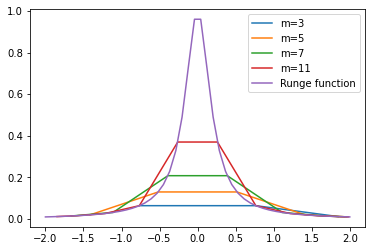

In [5]:
def cheb_nodes(n):
    k = np.arange(1,n)
    value = 2 * np.cos((2 * k - 1) * np.pi/(2 * n))
    return value

fig = plt.subplots()
x = np.linspace(-2, 2, 50)
m = [3, 5, 7, 11]
for i in m:
    xx = cheb_nodes(i + 1)
    yy = runge_func(xx)
    P = LagrangeInterpolator(xx, yy)
    plt.plot(xx, P(xx), label = f"m={i}")

plt.plot(x, runge_func(x), label = "Runge function")
plt.legend()